## Probability Distribution function:
- Kernel Density Estimation (KDE) is a non-parametric way of estimating the probability density function (PDF) of a random variable. The idea behind KDE is to smooth the data by fitting a smooth curve to the data points, thereby obtaining an estimate of the underlying PDF. The curve used for smoothing is called the kernel and it is selected based on the specific requirements of the data. The most commonly used kernels are Gaussian, Epanechnikov, and triangular kernels. The resulting estimate from KDE is not a perfect representation of the true PDF, but it is a useful tool for exploring the underlying distribution of the data.
- Area of curve of pdf along with x-axis is 1
- Normal distribution is also know as Gaussian distribution, Bell curve.
     - The normal (or Gaussian) distribution is called the "bell curve" because its shape is symmetrical and bell-shaped on a graph. It is also known as a Gaussian distribution because it was first described by mathematician Carl Friedrich Gauss. This distribution is important in statistics and is widely used in many fields such as biology, economics, psychology, and engineering, because many real-world phenomena can be modeled using this distribution.
     
     

Normal distribution is widely studied in statistics and mathematics due to its important properties and applications. Some of the reasons why normal distribution is studied are:

- Central Limit Theorem: The central limit theorem states that the sum of many independent random variables is approximately normally distributed, regardless of the distribution of the individual variables. This is a very important result in statistics and it is used to explain the normal distribution of many real-life phenomena.

- Simplicity: Normal distribution has a simple mathematical expression, which makes it easier to work with than other distributions. Also, the standard normal distribution (mean = 0, standard deviation = 1) has a known cumulative distribution function, which is useful for solving problems in probability.

- Occurrence in Real-life: Many real-life phenomena such as height, weight, intelligence, etc., are approximately normally distributed, making it a useful model for these data sets.

- Convenient for Modeling: Normal distribution is convenient for modeling because it is closed under linear transformations, meaning that the sum of normal distributions is also normally distributed. This property makes it easy to model complex systems.

## Normal distribution
- 1. Mean ($\mu$)
- 2. Variance ($\sigma^2$)

- $$  P(X=x) =  \frac{1}{\sigma\sqrt{2\pi}} 
  \exp\left( -\frac{1}{2}\left(\frac{x-\mu}{\sigma}\right)^{\!2}\,\right)
 $$

#### properties
 - Symmetrical
 - Centre is mean
 - mean = median = mode
 - The area under curve is formed area
 - Emperical low of (68-95-99)%
      - (-1 $\sigma $) to (1 $\sigma $) = 68%
      - (-2 $\sigma $) to (2 $\sigma $) = (68+27)% =65%
      - (-3 $\sigma $) to (3 $\sigma $) = (68+27+4)% = 99%
 

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

<AxesSubplot: ylabel='Count'>

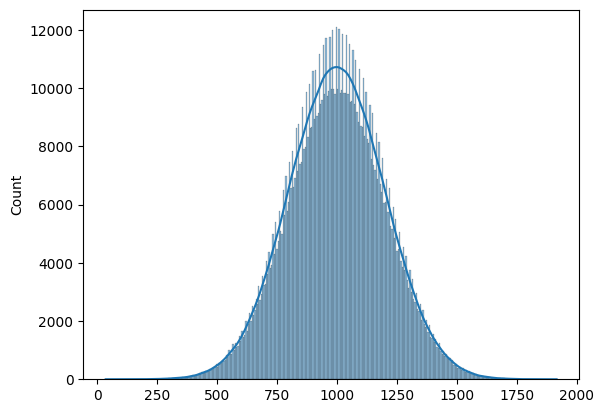

In [4]:
from scipy.stats import norm
import matplotlib.pyplot as plt

draw = norm.ppf(np.random.random(1000000), loc=1000, scale=200).astype(int)
sns.histplot(draw, kde=True)

In [4]:
z=[]
for i in draw:
    z.append((i-1000)/200)

In [5]:
a = np.array(z)

In [6]:
print(np.round(a.mean()))
print(np.round(a.std()))

-0.0
1.0


<AxesSubplot: ylabel='Count'>

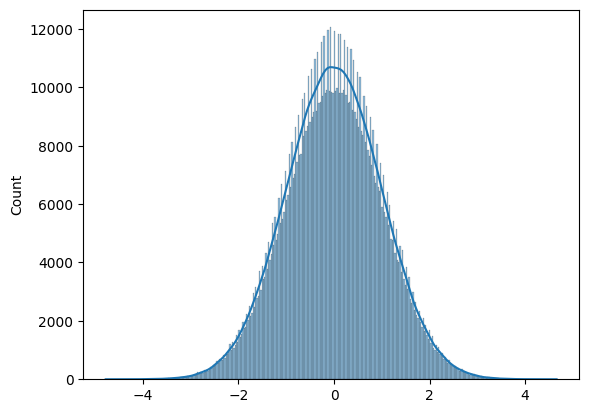

In [8]:
sns.histplot(a, kde=True)

## 2. Calculating Z-score

Problem 1: Imagine a group of 300 students took a test. Rohit scored 700 out of 1000. the average score is 50 and standard deviation was 120. Assuming that the test scores followed normal distribution find out how well Rohit performed in comparisms to his peers.

In [10]:
# calculation of Z
z = (700-500)/120
print(z)

1.6666666666666667


In [14]:
#1.6 + 0.6
a = 0.9515
print("Rohit performed ", a*100, "better than of his peers")

Rohit performed  95.15 better than of his peers


## Negative z-table
<img src="https://www.ztable.net/wp-content/uploads/2018/11/negativeztable.png">

## Positive z-table
<img src="https://www.ztable.net/wp-content/uploads/2018/11/positiveztable.png">

## Central Limit Theorem

In [5]:
delivery = pd.read_csv("deliveries.csv")
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
import warnings
warnings.filterwarnings("ignore")

In [7]:
runs = delivery.groupby("batsman").sum()["batsman_runs"]
len(runs)

516

<AxesSubplot: xlabel='batsman_runs', ylabel='Count'>

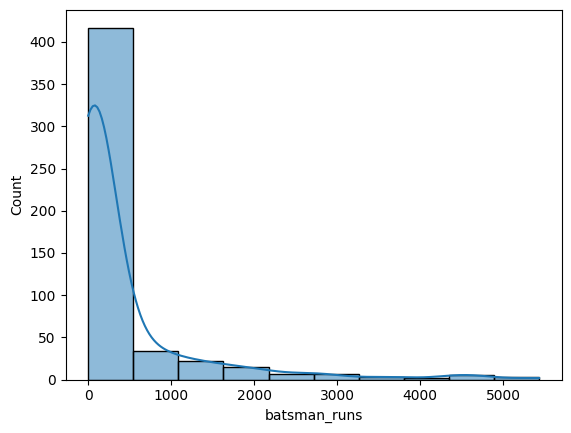

In [8]:
sns.histplot(runs, kde=True, bins=10)

# Sampling 
- There 516 data in runs
- n : 50/516 batsman taken per sample
- m  : 1000, number of times sampling done

In [11]:
np.random.choice(runs, size = 10)

array([  1, 759,   5,  92, 217,   3,  15,  24,  12,  66], dtype=int64)

In [14]:
m = 1000
n = 50

new = []

for i in range(m):
    x= np.random.choice(runs, size=n)
    new.append(x.mean())

In [15]:
len(new)

1000

In [16]:
new = np.array(new)

<AxesSubplot: ylabel='Count'>

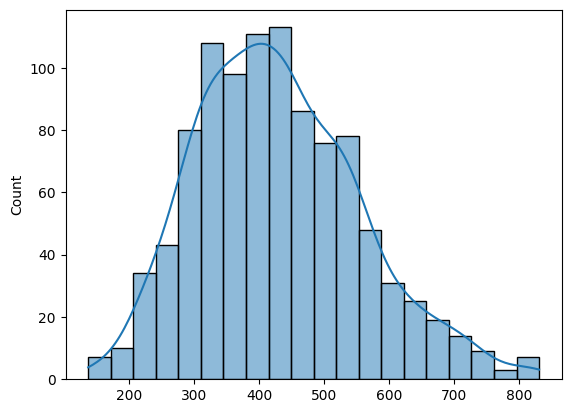

In [18]:
sns.histplot(new, kde=True)

In [20]:
runs.mean(), new.mean()

(432.7248062015504, 428.60476)

In [22]:
runs.var()/50, new.var()

(15703.62349213517, 15856.975276542398)

In [23]:
runs.std()/7.2, new.std()

(123.07006863617106, 125.92448243507852)